In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json


In [50]:
data = pd.read_csv('/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0908/MarkovProperty1000_1000_42.csv')

In [51]:
filepath = '/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0827/'
filepathTmp = filepath + 'packingFraction/'

pf = pd.read_csv('/Users/yitongzheng/Documents/Corey/BCM/diffusion/configuration/0827/packingFraction/pf_1000_1000_42.txt', sep=' ')
tetraInfo = pd.read_csv(filepathTmp + str(1000) + '_' + str(42) +  '_tetra.txt', sep=',')

pf = pf.dropna(axis = 1)
numConfigurations = len(pf)

pf = pf.T
pf.index = pf.index.astype(int)
pf = pf.reset_index()
pf = pf.rename(columns={'index': 'id'})
pf = pf.sort_index()

percolation = pf.copy()

cols = [i for i in range(numConfigurations)]
percolation[cols] = percolation[cols].mask(percolation[cols] < 1e-8, np.nan)

weighted = percolation.copy()
weighted = weighted.set_index('id')
tetraInfo = tetraInfo.set_index('id')
weighted[cols] *= tetraInfo.loc[weighted.index, "vol_fraction"].to_numpy()[:, None]

y = weighted.sum()
x = weighted.sum().index

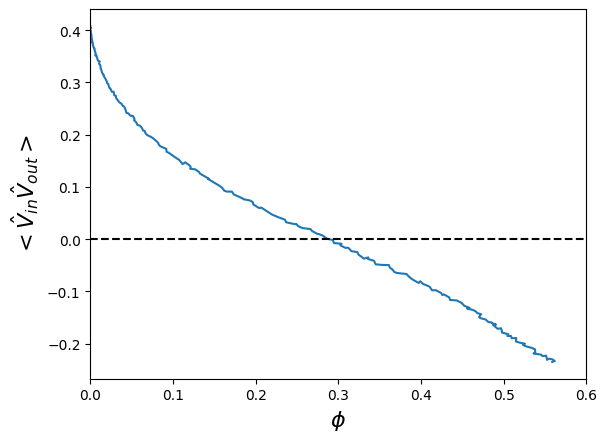

In [54]:
plt.plot(y, data.iloc[:len(y), 0])
plt.plot([0,0.6], [0,0], 'k--')
plt.xlim(0, 0.6)
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'$<\hat{V}_{in}\hat{V}_{out}>$', fontsize=16)
plt.show()

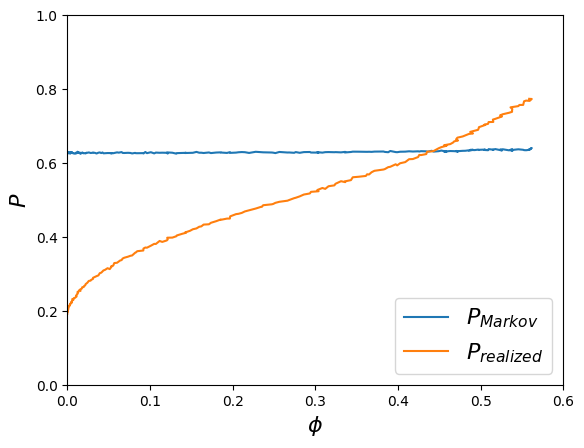

In [53]:
plt.plot(y, data.iloc[:len(y), 1])
plt.plot(y, data.iloc[:len(y), 2])
plt.legend(['$P_{Markov}$', '$P_{realized}$'], fontsize=16, loc='lower right')
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'$P$', fontsize=16)
plt.ylim(0, 1)
plt.xlim(0, 0.6)
plt.show()